# Решение кейса для продуктовых аналитиков (лето 2025)

In [19]:
import pandas as pd # Pandas = таблицы и данные
import matplotlib.pyplot as plt # для построения графиков
import seaborn as sns # исключительно для визуализации графиков
import warnings

# Отключение варнингов - лишние предупреждения
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("kicksharing.csv")

In [21]:
display(df.sample(10)) # показываем первые 6 строк

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
271213,347725000,108544142,M,39,GRD,MAR,РЕСП ТАТАРСТАН,7.49,40.0,300.0,Max,4.677193,2024-09-20 10:22:43.000000,2024-09-20 10:22:48.584000,2024-09-20 10:49:48.717478,3,2024-09-20 10:22:48.584000,242.23,76.67,NaN
351885,273796980,1028921182,M,30,NaN,NaN,ЯМАЛО-НЕНЕЦКИЙ АО,6.49,50.0,300.0,E,1.899328,2024-09-04 15:47:43.000000,2024-09-04 15:47:46.776219,2024-09-04 15:57:37.084552,5,2024-09-04 17:47:46.776219,114.90,114.90,NaN
45942,258384101,138578306,M,36,NaN,NaN,МОСКВА,8.70,50.0,300.0,SL,0.949944,2024-07-09 15:22:09.000000,2024-07-09 15:22:13.296487,2024-07-09 15:26:36.828911,3,2024-07-09 15:22:13.296487,93.50,18.70,NaN
199727,352096363,975736065,M,41,NaN,NaN,САРАТОВСКАЯ ОБЛ,7.99,40.0,300.0,SL,0.616068,2024-10-06 14:59:55.000000,2024-10-06 14:59:59.979000,2024-10-06 15:07:41.863091,4,2024-10-06 15:59:59.979000,103.92,45.78,NaN
3853,270990542,426730744,M,22,NaN,NaN,NaN,7.49,30.0,300.0,Max,0.651998,2024-08-25 14:35:29.000000,2024-08-25 14:35:33.337260,2024-08-25 14:37:44.145794,3,2024-08-25 14:35:33.337260,52.47,5.25,NaN
361458,256549525,1171098079,M,49,NaN,NaN,Г МОСКВА,8.49,0.0,300.0,SL,0.504776,2024-07-02 08:02:45.000000,2024-07-02 08:02:48.190369,2024-07-02 08:05:36.010361,3,2024-07-02 08:02:48.190369,25.47,2.55,NaN
357146,272728151,370298773,M,28,UGR,MAR,КРАСНОЯРСКИЙ КРАЙ,7.49,50.0,300.0,SL,0.409782,2024-08-30 23:47:50.000000,2024-08-30 23:47:52.734359,2024-08-30 23:51:41.635154,3,2024-08-30 23:47:52.734359,79.96,8.00,NaN
136739,348558177,130085522,M,30,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,1.193630,2024-09-23 09:42:24.000000,2024-09-23 09:42:29.495000,2024-09-23 09:47:47.833257,3,2024-09-23 09:42:29.495000,94.94,18.99,NaN
154715,271508657,244164945,M,42,NaN,NaN,РЕСП БАШКОРТОСТАН,4.99,50.0,300.0,E,0.867382,2024-08-27 11:57:30.000000,2024-08-27 11:57:34.187884,2024-08-27 12:05:18.390540,5,2024-08-27 13:57:34.187884,89.92,89.92,NaN
287028,255772206,757552213,F,27,SCH,MAR,МОСКОВСКАЯ ОБЛ,6.99,50.0,300.0,ES200,4.022765,2024-06-29 03:14:18.000000,2024-06-29 03:14:21.296550,2024-06-29 03:40:12.157608,3,2024-06-29 03:14:21.296550,231.74,46.00,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [23]:
df.isnull().sum()

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

KeyboardInterrupt: 

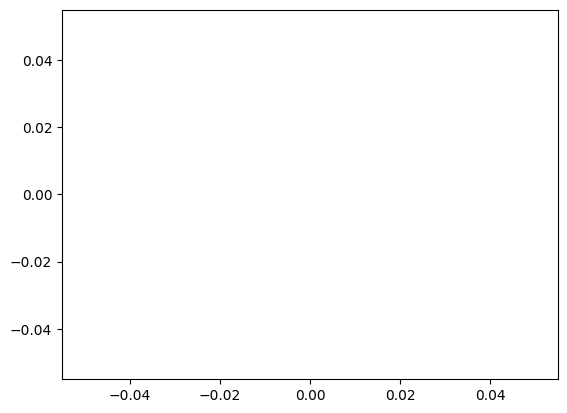

In [40]:
sns.histplot(data=df)


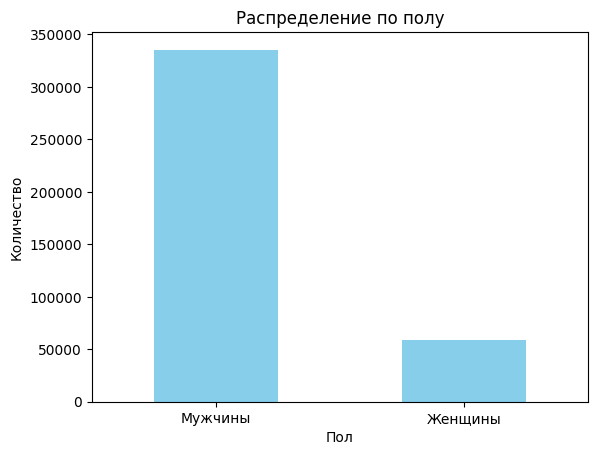

In [34]:
df['gender_cd'].dropna().value_counts(dropna=False).plot(kind='bar', color='skyblue')
plt.title("Распределение по полу")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

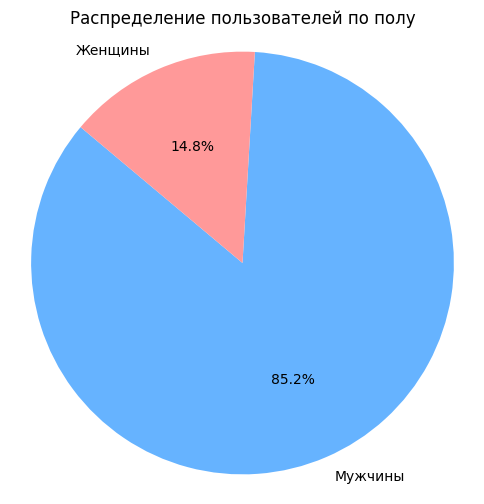

In [33]:
# Убираем пропущенные значения
gender_counts = df['gender_cd'].dropna().value_counts()
df['gender_cd'] = df['gender_cd'].replace({'M': 'Мужчины', 'F': 'Женщины'})

# Подписи и цвета (по желанию)
labels = gender_counts.index
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Можно адаптировать под твои категории

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Распределение пользователей по полу')
plt.axis('equal')  # Чтобы круг был ровным
plt.show()

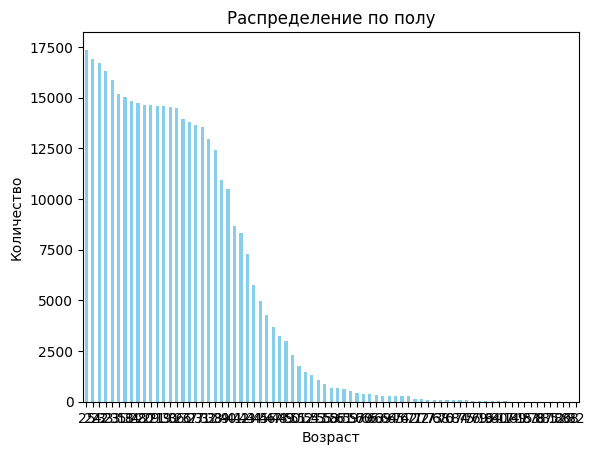

In [38]:
df['age'].value_counts(dropna=False).plot(kind='bar', color='skyblue')

plt.title("Распределение по полу")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()